In [1]:
%matplotlib ipympl
import mda_simulator
from pathlib import Path

import napari
from pymmcore_plus import CMMCorePlus
from useq import MDASequence

from mda_simulator import ImageGenerator
from mda_simulator.mmcore import FakeDemoCamera

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

## Open Napari and Set up Fake Demo

In [4]:
v = napari.Viewer()
dw, main_window = v.window.add_plugin_dock_widget("napari-micromanager")

core = CMMCorePlus.instance()
core.loadSystemConfiguration('config.cfg')


gen = ImageGenerator(N=1, snr = 1, extent=.5, step_scale=(8, 4))


# Create an object that will modify the `snap` method of the CMMCorePlus
# instance to return images from our ImageGenerator
fake_cam = FakeDemoCamera(
    gen,
    timing=1,  # how many real world seconds to wait to step the ImageGenerator time
    core=core,
)
core.setConfig('Channel', 'DAPI') 

## Basic image registration

In this section, we will demonstrate how to to snap an image through napari and some simple code to figure out the center of mass of the object. You will use this knowledge to build your own on-the-fly stage recentering algorithm.

## Snapping an image

In [5]:
def reset_object():
    """
    Bring everything back to the center
    """
    gen._pos[:] = [0,0]  # run this in case the sphere move out of frame
    gen.increment_time()
    core.setXYPosition(0,0)

In [6]:
reset_object()

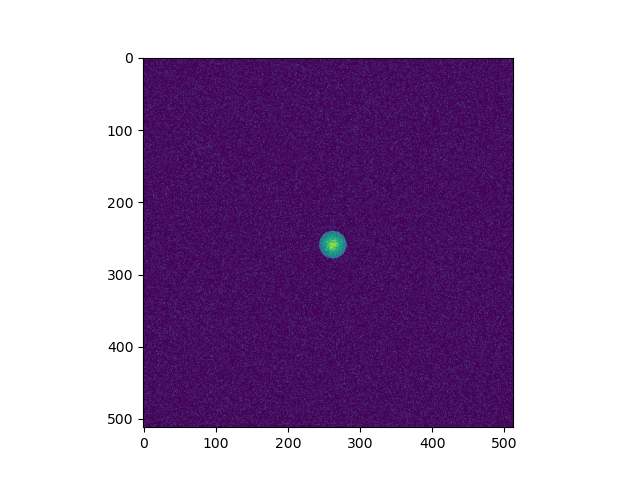

In [7]:
image = core.snap() # take an snapshot

plt.figure()
plt.imshow(image)

## Locating the center of mass of the object

In [300]:
com = ndi.center_of_mass(image > np.max(image) - np.std(image)) # locating the center of mass by thresholding pixel intensity

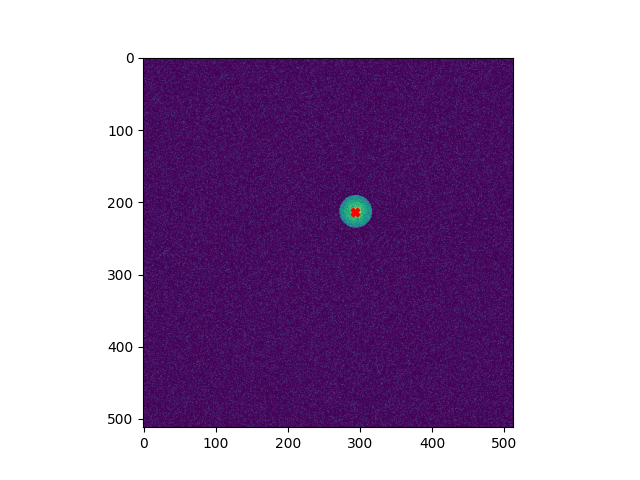

In [301]:
plt.figure()
plt.imshow(image)
plt.scatter(*com[::-1], c='r', marker='X')

# On-the-fly Recentering 

In this section, you will try developing your own algorithm to do on-the-fly stage recentering that follows along the movement of a moving object.

## Hints

In [39]:
img = core.getLastImage() # how to get a snapshot when you are in live mode

In [42]:
XY = np.asarray(core.getXYPosition()) # how to get the current stage position

In [258]:
core.setXYPosition(0, 0) # how to set the current stage position

Note that the frame of reference between the center of mass and the actual position of the circle in napari are different. You will need to do a transformation on the coordinates.

In [259]:
# turn on live mode in napari and change the arguments of this function
# to get a sense of where the origin is defined in napari

def set_ball_position(X, Y):
    gen._pos[:] = [X, Y]
    gen.increment_time()

# note this is just for figuring out the coordinates transformation. 
# In your function, you should only be changing the stage position.
set_ball_position(0, 0)

## Build your own function

In [298]:
def centerTheObject():
    ...
    
centerTheObject()

## Updating as new live mode images come


Using signals


- `continuousSequenceAcquisitionStarted`
- `sequenceAcquisitionStopped`


There's some starting code below - try it if you feel very inspired - but this is mostly meant as a demo

In [ ]:

from qtpy.QtCore import QTimer
streaming_timer = QTimer()
streaming_timer.start(int(core.getExposure()))

streaming_timer.timeout.connect(<FUNC TO BE REGULARLY CALLED>)